# Overview

This project aims to figure out which expense types best explain the significant increase in the accrued debt by San Diego's Parks and Recreation department since after fiscal year 2014. I did some pure statistical data analysis to figure out which expenses had signficant increases, how much extra money was put towards these expenses, and what the names of the top expenses were. What this project found is that the main reasons for this significant increase in accrued debt are: expense increases in the department's workforce, technological investements for the department, a huge surge in city services by the department, and general maintenance costs. Ah, and trimming trees! 🌲


<center>
    <img src='https://www.sandiego.gov/sites/default/files/styles/100_percent/public/legacy/parkandrecboard/graphics/featureboard.jpg?itok=IVRyTzoP'>
    <a href='https://www.sandiego.gov/sites/default/files/styles/100_percent/public/legacy/parkandrecboard/graphics/featureboard.jpg?itok=IVRyTzoP'>image source</a> 
<center>

# Name & GitHub ID

Name: Julian Alberto  
GitHub ID: julian1999

# Research Question

Which types of expenses have contributed to the significant increase in yearly accrued debt by San Diego Parks and Recreation after fiscal year 2014?

# Background and Prior Work

Everyone loves the vibe in San Diego from the nice beaches, the lovely neighborhoods, and to the beautiful parks. According to the U.S. 2017 census, the population of San Diego is roughly 1.4 million! $^1$ On top of that, San Diego's land size is 342.37 miles squared; it's huge! $^2$ Given the large population San Diego holds, its large land size, and its natural variety in beautiful terrain, it makes sense that San Diego has developed many parks throughout its existence. Taken from San Diego's Parks and Recreation page, they state "San Diego Parks and Recreation oversees nearly 40,000 acres of developed and undeveloped open space, more than 340 parks and 25 miles of shoreline from Sunset Cliffs to La Jolla." $^3$ Wow, those are *a lot* of parks which San Diego's Parks and Recreation Department is in charge of. San Diego is a pricey city (similar to bay area or los angeles), and just about any service is going to cost you extra to meet higher economical demands. Now, that begs the question: how much money goes into San Diego's Parks and Recreation Department's expenses to maintain and manage all of these parks? And also, how have the department's finances been looking these past several years? This is the motivation that I am going off of for the purpose of this project. I want to figure out how San Diego's Parks and Recreation Department has been doing on its finances and where it has been putting its money in order to maintain the aesthetic vibe of beautiful sunny San Diego. Regarding previous work done on this topic, I'm sure that San Diego's Parks and Recreation department must have some internal data analysis team or accountants which manage all of its financial expenses. You can view some of their pubic data visuals on how they invest the county's budget across different domains <a href='https://budget.sandiego.gov/transparency#/'>here</a>. You can click 'Neighborhood Services' and then click on 'Parks and Recreation'.

1. https://www.sandiego.gov/economic-development/sandiego/population
2. https://www.sandiego.gov/economic-development/sandiego/population
3. https://www.sandiego.gov/park-and-recreation/parks

# Hypothesis

I hypothesize that San Diego's Parks & Recreation department has been distributing its expenses differently in recent years, and possibly has even begun to spend more in new expenses not previously spent on before. The reason I believe this is because it is very unlikely that a city department (or any business for that matter) keeps its distribution of expenses constant year after year. Times change, and so does the flow and distribution of money, so I am interested in seeing how the distribution of financial expenses has changed within San Diego's Parks and Recreation department over the past several years.

# Datasets

- **operating_actuals_dictionary_datasd.csv**
    - Link: https://github.com/COGS108/individual_fa20/blob/master/data/operating_actuals_dictionary_datasd.csv
    - Number of observations: 8
    - Description: gives some more information regarding some of the attributes of the actuals_operating_datasd dataset
- **actuals_operating_datasd.csv**
    - Link: https://github.com/COGS108/individual_fa20/blob/master/data/actuals_operating_datasd.csv
    - Number of observations: 454891  
    - Description: contains information about revenue and expenses within different departments for San Diego County.

# Setup

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap

GitHub link to the raw dataset that I will be using for data analysis

In [2]:
finances_dataset_link = 'https://raw.githubusercontent.com/COGS108/individual_fa20/master/data/actuals_operating_datasd.csv'

Creating dataframes for each dataset

In [3]:
finances_df = pd.read_csv(finances_dataset_link)

# Data Cleaning

Here's how the original dataset looks like:

In [4]:
finances_df.head()

,amount,report_fy,fund_type,fund_number,dept_name,funds_center_number,account,account_number
0,349193.50,17,General Fund,100000,Office of the Chief Operating Officer,1001000011,Salaried Wages,500011
1,23875.99,17,General Fund,100000,Office of the Chief Operating Officer,1001000011,Vacation,500014
2,7449.95,17,General Fund,100000,Office of the Chief Operating Officer,1001000011,Sick Leave/Vacation Accrual,500015
3,2942.31,17,General Fund,100000,Office of the Chief Operating Officer,1001000011,A/L Bereavement Pay,500016
4,1532.45,17,General Fund,100000,Office of the Chief Operating Officer,1001000011,Vacation Pay In Lieu,500017


I want to know revenue and expenses incurred every year since 2011 regarding the Parks & Recreation department.
I start by removing all rows which do not pertain to the Parks & Recreation department.

In [5]:
finances_df = finances_df[(finances_df['dept_name'] == 'Parks & Recreation')]

I then only keep columns I care about and rename the columns such that they make more sense.

In [6]:
columns_to_drop = ['fund_type', 'fund_number', 'dept_name', 'funds_center_number']
finances_df = finances_df.drop(columns=columns_to_drop).reset_index(drop=True)
finances_df.columns = ['amount', 'year',  'reason', 'account number']

Here's a function to help me determine whether an account was an expense or not. Account numbers beginning with a 4 are an exepnse, while account numbers beginning with a 5 are revenue.

In [7]:
def is_an_expense(account_number):
    if(int(account_number / 10**5) == 4):
        return False
    elif(int(account_number / 10**5) == 5):
        return True

In [8]:
finances_df = finances_df.assign(expense=finances_df['account number'].apply(is_an_expense))
finances_df = finances_df.drop(columns=['account number'])

There are a few *revenue* amounts that are listed as negative, and I believe it's because these are actually expenses that the department resulted in incurring, even though this is usually a revenue reason. For example, I saw several NSF (Not Sufficient Funds) reasons, meaning that whoever had to pay the department did not have sufficient funds in their payment account. I will mark expense as true for these entries and leave the value negative.

In [9]:
# A few examples about what I'm talking about
finances_df[(finances_df['amount'] < 0) & (finances_df['expense'] == False)].head()

,amount,year,reason,expense
259,-1512.00,17,Other Fees-P&R,False
336,-236.00,17,NSF Check Processing,False
612,-1327.50,17,Picnic Shelter,False
1081,-90.00,17,Picnic Shelter,False
2591,-22.75,17,NSF Check Processing,False


In [10]:
# looking for: (amount is negative ^ not expense)
def fix_bad_revenue_entry(row):
    if(row['amount'] < 0 and not row['expense']):
        row['expense'] = True
    return row

finances_df = finances_df.apply(lambda row: fix_bad_revenue_entry(row), axis = 1)

Now for the *expenses*, just make all of the amount values negative

In [11]:
# looking for: (amount is negative ^ not expense)
def make_expense_negative(row):
    if(row['amount'] > 0 and row['expense']):
        row['amount'] = row['amount'] * -1
    return row

finances_df = finances_df.apply(lambda row: make_expense_negative(row), axis = 1)

Next, we can simply remove the expense column because we know that *positive* amounts indicate revenue, and *negative* amounts indicate expenses.

In [12]:
finances_df = finances_df.drop(columns=['expense'])

Finally, we arrive at our clean finances dataframe

In [13]:
finances_df.head()

,amount,year,reason
0,75.52,17,Graffitti Control Restitution
1,156.84,17,Repair Damages Recovered
2,-6478.12,17,Salaried Wages
3,-188.86,17,Supp Pens Sav Plan Mandatory
4,-181.19,17,Supp Pens Sav Plan Voluntary


# Data Analysis & Results

I will first begin by generating a time series graph regarding San Diego's Parks and Recreation debt accrued from the year 2011 to the year 2019.

In [14]:
total_debt_per_year = []
for year in range(min(finances_df['year'].unique()), max(finances_df['year']) + 1):
    # divide by 1 million so that it will appear with better notation on the graph
    total_debt_per_year.append(abs(finances_df[finances_df['year'] == year]['amount'].sum() / 10**6))
    

In [15]:
# create a new data frame to plot with seaborn
debt_yearly_dict = {'debt': total_debt_per_year}
earliest_year = 2000 + min(finances_df['year'])
latest_year = 2000 + max(finances_df['year'])
financials_yearly_df = pd.DataFrame(debt_yearly_dict, index=[year for year in range(earliest_year, latest_year + 1)])

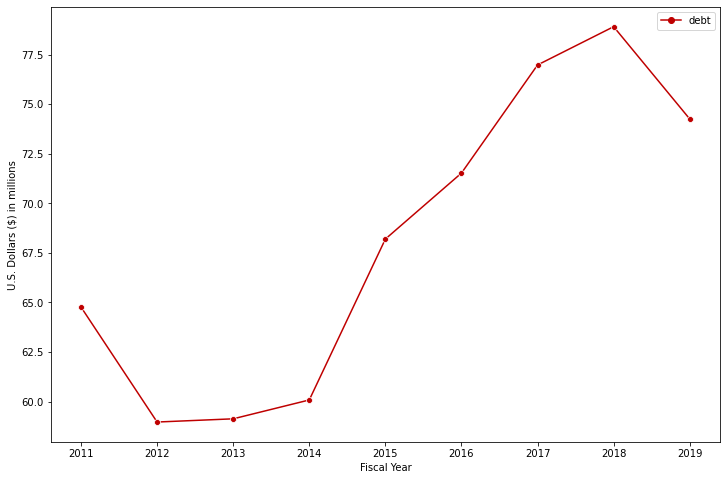

In [16]:
sns.lineplot(data = financials_yearly_df, markers=True, dashes=False, hue="coherence", style="choice", palette="gist_heat_r")
plt.xlabel('Fiscal Year')
plt.ylabel('U.S. Dollars ($) in millions')
plt.title = 'San Diego Parks & Rec Debt since 2012'
sns.set(font_scale=1.50)
print()
fig = plt.gcf()

# Change seaborn plot size
fig.set_size_inches(12, 8)

Wow! There is a big spike in financial yearly debt accrued by the Parks & Rec Department after fiscal year 2014. Next, let's explore the distribution of expenses per year using a stacked bar plot.

First, I *initialize* an empty dictionary that will map a year to a list of entries: [(expense type, amount total) ... ].

In [17]:
sum_of_expense_reason_yearly = {}
for year in range(earliest_year, latest_year + 1):
    sum_of_expense_reason_yearly[year] = []

Then, I add the following mappings to my dictionary: year $\rightarrow$ [ (expense type, amount total), (expense type, amount total) ... ]

In [18]:
finances_yearly_distribution_df = finances_df.groupby(['year', 'reason']).sum()

for index, row in finances_yearly_distribution_df.iterrows():
    year = 2000 + index[0]
    reason = index[1]
    amount = row['amount']
    if(amount < 0):
        new_entry = [reason, abs(amount)]
        sum_of_expense_reason_yearly[year].append(new_entry)

There are some reason types for which expenses were spent on some years, but not others. I need to make sure to add the missing reasons to each year and just assign the amount to zero for that entry in order to be able to create the dataframe later on (so that all my mappings are of the same length). 

In [19]:
expense_reasons = list(finances_df[finances_df['amount'] < 0]['reason'].unique())

In [20]:
for year in range(earliest_year, latest_year + 1):
    missing_expense_reasons = set(expense_reasons) - set([row[0] for row in sum_of_expense_reason_yearly[year]])
    # also add expense reasons that are missing and assign them a value of 0
    for missing_expense_reason in missing_expense_reasons:
        sum_of_expense_reason_yearly[year].append([missing_expense_reason, 0])
    # sort by the reason
    sum_of_expense_reason_yearly[year].sort(key=lambda x:x[0])
    # get rid of reason
    old_entries = sum_of_expense_reason_yearly[year]
    new_entries = []
    for entry in old_entries:
        new_entries.append(entry[1])
    sum_of_expense_reason_yearly[year] = new_entries
    

Since this dataframe will be using the reasons as an index, I also sorted the mappings on the reason, and then I removed the reason from each entry because my dataframe is already going to be using expense reasons as its indices.

Now, I can create the dataframe of total yearly expenses indexed by reason

In [21]:
sorted_expense_reasons = list(finances_df[finances_df['amount'] < 0]['reason'].unique())
sorted_expense_reasons.sort()
total_yearly_expenses_by_reason_df = pd.DataFrame(sum_of_expense_reason_yearly, index = sorted_expense_reasons)

Here is a preview of how the dataframe looks. We can now see how much money went to a specific expense on a specific year!

In [22]:
total_yearly_expenses_by_reason_df.head()

,2011,2012,2013,2014,2015,2016,2017,2018,2019
1 Day Trips-Less Than 200 Miles,0.00,0.00,0.00,0.00,0.00,1479.16,0.00,0.00,165.88
401(A) Plan Mandatory,7221.18,15136.36,28390.57,33952.11,34936.22,35091.50,36017.61,36812.58,36321.00
A/L Bereavement Pay,12600.31,14974.39,18004.75,24901.14,20901.70,29535.51,50589.22,40987.38,48094.40
Abrasives,7765.29,1572.14,3837.80,2342.75,2052.88,253.05,3152.09,1583.91,1708.26
Accessories-Motive Fitting,0.00,0.00,6398.81,0.00,0.00,0.00,0.00,0.00,0.00


Here is a function to convert each year entry in a row to a proportion

In [23]:
def convert_to_proportion(row):
    total_amounts = sum(row.values)
    for index in range(len(row.values)):
        if(total_amounts == 0):
            row.values[index]
        else:
            proportion =  row.values[index] / total_amounts
            row.values[index] = proportion
    return row

The new data frame below will contain the proportion of the expense paid per year relative to all the other years

In [24]:
yearly_expense_proportions_df = total_yearly_expenses_by_reason_df.apply(lambda row: convert_to_proportion(row), axis=1)
yearly_expense_proportions_df.head()

,2011,2012,2013,2014,2015,2016,2017,2018,2019
1 Day Trips-Less Than 200 Miles,0.000000,0.000000,0.000000,0.000000,0.000000,0.899164,0.000000,0.000000,0.100836
401(A) Plan Mandatory,0.027365,0.057361,0.107589,0.128665,0.132395,0.132983,0.136493,0.139505,0.137643
A/L Bereavement Pay,0.048353,0.057464,0.069093,0.095557,0.080210,0.113341,0.194134,0.157288,0.184561
Abrasives,0.319978,0.064782,0.158141,0.096536,0.084591,0.010427,0.129886,0.065267,0.070391
Accessories-Motive Fitting,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


Below is an example of just a few of the expense distributions
**[Legend]** 2011 <font color="#d2f8d2">█</font> $\rightarrow$ 2019 <font color="#00468b">█</font>

In [25]:
sns.set_style(style='white')
ax = yearly_expense_proportions_df.iloc[0:6].plot(kind='barh', stacked=True,
          colormap=ListedColormap(sns.color_palette("GnBu", 10)), 
          figsize=(200,60), fontsize=200, legend=False)
ax.set_xlabel('Proportion', fontsize=300) 
ax.set_title('Distribution of expenses spent on a reason accross 2011 to 2019', fontsize=300)

Text(0.5, 1.0, 'Distribution of expenses spent on a reason accross 2011 to 2019')

We are concered with those expense reasons which have a significantly larger proportion of **<font color='#00468b'>blue</font>**! It means that a higher proportion of money has been spent on those expenses in the most recent years as opposed to earlier years! For example, A/L Bereavement Pay has a total 75% distribution among years 2015 to 2019 alone.

We need to determine which expenses are "significant", meaning that its expected proportion of money spent from 2015 to 2019 is higher than expected. Across 9 years, I would expect a proportion of $\frac{1}{9}$ held by each year if the amount spent on that expense each year was exactly the same. So, across 2015 $\rightarrow$ 2019, I expect a proportion of $\frac{5}{9}$ or less if it wasn't a significant increase in costs

In [26]:
# A function to get the sum of a range in a row in my dataframe
def sum_of_range(row, start, end):
    total = 0
    for index in range(start, end):
        total += row.values[index]
    return total

Create a column for the sum of proportions from 2015 to 2019

In [27]:
proportion_df = yearly_expense_proportions_df.assign(prop_sum_2015_to_2019=yearly_expense_proportions_df.apply(lambda row: sum_of_range(row, 4, 9), axis=1))

Drop all the columns from 2011 to 2019

In [28]:
columns_to_drop = []
for year in range(2011, 2020): columns_to_drop.append(year)

proportion_df = proportion_df.drop(columns=columns_to_drop)

Remove any rows whose proportion sum from 2015 to 2019 is below $\frac{5}{9}$

In [29]:
proportion_df = proportion_df[proportion_df['prop_sum_2015_to_2019'] > 5/9]

Create a dataframe that has the total sum in expenses for 2011 to 2014 and total sum in expenses for 2015 to 2019

In [30]:
expenses_df = pd.DataFrame(sum_of_expense_reason_yearly, index = sorted_expense_reasons)
expenses_df = expenses_df.assign(total_2011_to_2014=expenses_df.apply(lambda row: sum_of_range(row, 0, 4), axis=1))
expenses_df = expenses_df.assign(total_2015_to_2019=expenses_df.apply(lambda row: sum_of_range(row, 4, 9), axis=1))

Again, drop all the columns from 2011 to 2019

In [31]:
expenses_df = expenses_df.drop(columns=columns_to_drop)

Join the proportion dataframe and expenses dataframe on the expense reason

In [32]:
result_df = proportion_df.join(expenses_df)

Drop the proportion sum from 2015 to 2019 as we were only using it to keep only reasons that are relevant

In [33]:
result_df = result_df.drop(columns=['prop_sum_2015_to_2019'])

Calculate the extra amount that was spent on each expense reason from 2015 to 2019

In [34]:
result_df = result_df.assign(extra=result_df.apply(lambda row: row.values[1] - row.values[0], axis=1))

We now have how  much extra money was spent towards each expense that had a higher proportion of money spent on it in recent years.

In [35]:
result_df.head()

,total_2011_to_2014,total_2015_to_2019,extra
1 Day Trips-Less Than 200 Miles,0.00,1645.04,1645.04
401(A) Plan Mandatory,84700.22,179178.91,94478.69
A/L Bereavement Pay,70480.59,190108.21,119627.62
Air Conditioning Units,3010.65,9983.71,6973.06
Approved Administrative Leave,0.00,102.34,102.34


Drop the total expense amount columns as they were only needed to calculate the extra amount spent column

In [36]:
result_df = result_df.drop(columns=['total_2011_to_2014', 'total_2015_to_2019'])

Sort the values in descending order such that the most "extra" money expenses are at the top

In [37]:
result_df = result_df.sort_values('extra', ascending=False)

Now, plot the this information in a visual format using a horizontal bar plot

In [38]:
#sns.set_style(style='white')
ax = result_df.iloc[0:15].plot(kind='barh', stacked=True,
          colormap=ListedColormap(sns.color_palette("summer", 10)), 
          figsize=(200,100), fontsize=300) # 15
ax.set_xlabel('U.S. Dollars ($) in tens of millions', fontsize=300) 
ax.set_title('Top 15 expense reasons from 2015-2019', fontsize=300)
print()

These are the top 15 expenses that were being spent more on from 2015 to 2019!

### Results

One of the big expense reasons popping out at me is SAP Support Allocation. Being the software guy that I am, SAP is a large international German-founded software company with a product line of different business applications. So, it appears that San Diego Parks and Recreation has purchased some software from SAP, hence probably why we also see Miscellaneuous Professional/*Technical* Services listed up there as well. Of course, there is also a *huge* surge in city service payments  (roughly $58 million since 2015!). There are also various notebale increases in the spendings the department makes towards its workforce such as: Retiree Health Contribution, Salaried Wages, CERS - General Retirement, Flexible Benefit Plan, and Hourly Wages. Lastly, I found the increase in tree trimming to be rather amusing; I do recall San Diego's trees always being nicely trimmed now that I think about it! If I had to sum it all up, I would argue that there were four expense types that are significant: technological investments, workforce, city services, and general maintenance regarding parks and recreation.

Fun fact: I inteviewed at SAP several weeks ago, passed their technical assessment, and got rejected after their behavioral interview. What did I do next? Applied to their competitor, Oracle, and just recently signed a job offer letter. Take that SAP!

<center>
    <img = 'https://ntgclarity.com/uploads/services/44a87-smart-city-icon.png'>
<center>

<center>
    <img width=100rem src='https://upload.wikimedia.org/wikipedia/commons/thumb/5/59/SAP_2011_logo.svg/1200px-SAP_2011_logo.svg.png'>
    <img width=100rem src='https://www.tac-atc.ca/sites/default/files/images/vision_mission/icon_vision_workforce.png'>
    <img width=100rem src='https://ntgclarity.com/uploads/services/44a87-smart-city-icon.png'>
    <img width=100rem src='https://cdn.iconscout.com/icon/free/png-256/maintenance-26-415018.png'>
</center>

# Ethics & Privacy

Earlier in this project I had to make a few decisions on how to interpret some of the amount entries inputted into the finances dataset. If my interpretation of these entries is incorrect, then my analysis has some minor inaccuracies. To further ensure complete accuracy of my data analysis, I would need to double-check my interpretations with San Diego's department which is in charge of data collection for this particular dataset. Also, I could request to have my work reviewed by San Diego's Parks and Recreation department to make sure that my findings are consistent and to get their stamp of approval on my project overall. This way, my work is proven to be authentic and does not cause uintentional harm through accidental fallacies. Since this data is objective (i.e. monetary values), it's difficult to argue if there exists bias in the data. Potentially, it could be possible that some amounts were inflated or deflated or simply omitted. In that case, then there could be potentially bias, however this is out of my control and I can only hope that San Diego Parks and Recreation is being as honest and accurate as possible regarding their expenses. If I were to realease my findings, it might stir up controversy amongst the inhabitants of San Diego. This is largely because local tax payer money is what funds most of the city's expenses, and according to Richard Ciccarone, president of Merritt Research, cities are going to have to increase taxes to keep these levels of services going. $^1$ Some individuals may not be too fond of the idea that they might have been paying slightly more in taxes to accomodate these increasing costs. Regarding privacy, perhaps San Diego Parks and Recreation would not be comfortable with me sharing some of these findings as debt is not a touching point in their data visualizations. Here, I make it very explicit, direct, and clear that there has been significant debt accrued since after 2014 and exactly which top expenses are responsible for it .

1. https://www.governing.com/topics/finance/gov-legacy-cities-bills-debt.html

# Conclusion & Discussion

The San Diego Parks and Recreation department began to accrue significantly more debt after fiscal year 2014. In the linear time series debt graph from earlier, you can see that the debt accrued per year averages a little above 60 million US Dollars from 2011 to 2014. In contrast, from 2015 to 2019, this average spikes up to around 75 million US Dollars. Regarding my research question: **Which types of expenses have contributed to the significant increase in yearly accrued debt by San Diego Parks and Recreation after fiscal year 2014?** I found that there are four main expense types that explain the increases in debt after fiscal year 2014: increases/investments into the department's workforce, technological investements for the department, a huge surge in city services, and general maintenance. Also, an interesting bonus one: tree trimming to make sure San Diego's trees are looking nice and pretty! Regarding some limitations of my analysis, it might be the case that debt is actually decreasing but I don't have data from this dataset before 2011, so my analysis is limited on the 2011 to 2019 time scale. This is why I made sure to only focus on the increases in debt after 2014, instead of a general question like "why is San Diego's Parks and Recreation department's debt so high?" because this is too broad of a question.